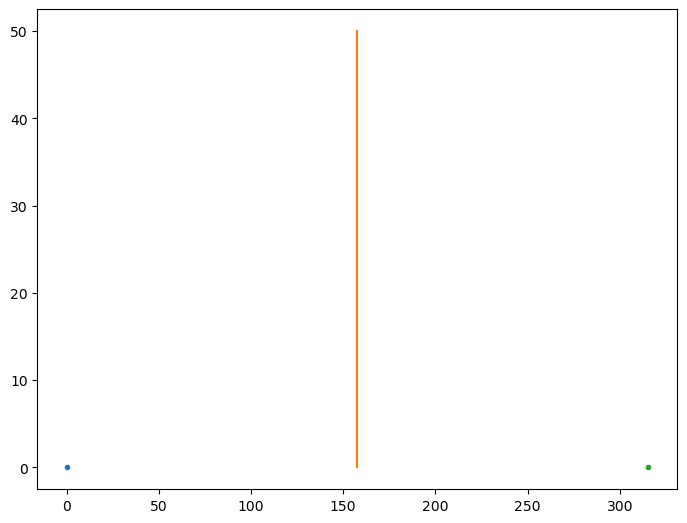

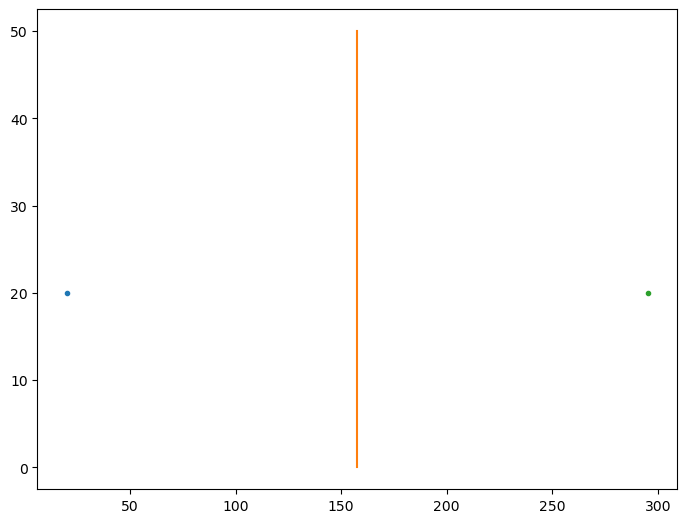

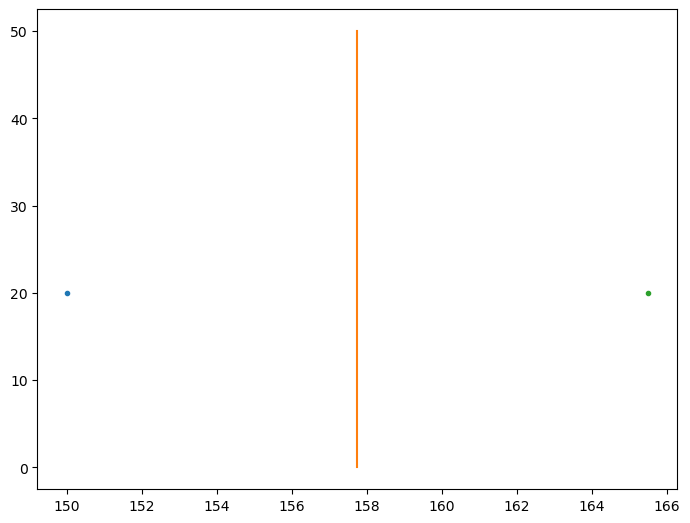

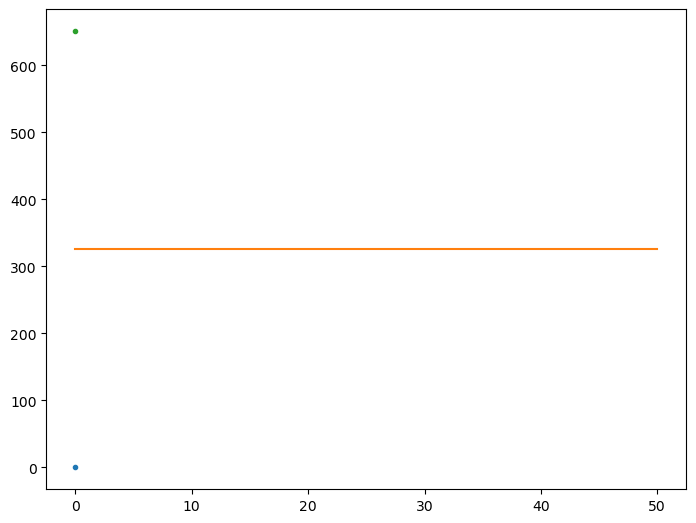

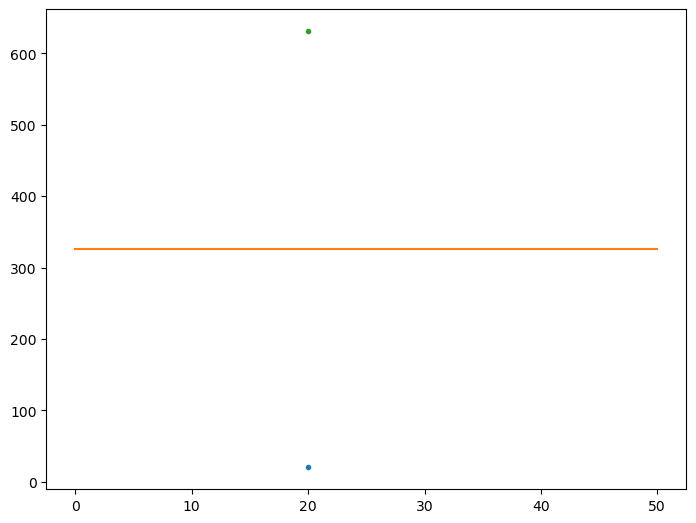

In [22]:
import numpy
import math
from dataclasses import dataclass
from matplotlib import pyplot as plt

def inches_to_meters(inches):
    return inches * 0.0254

@dataclass
class Rectangle:
    upper_left_x : float = 0
    upper_left_y : float = 0
    lower_right_x : float = 0
    lower_right_y : float = 0

@dataclass
class Translation:
    x : float = 0
    y : float = 0

@dataclass
class Rotation:
    yaw : float = 0

@dataclass
class Pose:
    position : Translation = Translation()
    orientation : Rotation = Rotation()

    def __str__(self):
        return f"X: {self.position.x}, Y: {self.position.y}, R: {math.degrees(self.orientation.yaw)}"

def epsilonEquals(a : float, b: float, epsilon : float = 0.000001) -> bool:
    return (a - epsilon <= b) and (a + epsilon >= b)

def mirror_across_line(input_pose : Pose, mirror_line : Rectangle) -> Pose:
    is_horizontal = epsilonEquals(mirror_line.lower_right_y, mirror_line.upper_left_y)
    is_vertical = epsilonEquals(mirror_line.lower_right_x, mirror_line.upper_left_x)
    
    if is_vertical and is_horizontal or (not is_vertical and not is_horizontal):
        return None
    
    output_pose = Pose(input_pose.position, input_pose.orientation)

    if is_vertical:
        output_pose.position.x = (mirror_line.lower_right_x - input_pose.position.x) * 2.0 + input_pose.position.x
        output_pose.orientation.yaw += math.pi
    elif is_horizontal:
        output_pose.position.y = (mirror_line.lower_right_y - input_pose.position.y) * 2.0 + input_pose.position.y

    return output_pose

def plot_poses_and_lines(input_pose : Pose, line : Rectangle):
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.plot(input_pose.position.x, input_pose.position.y, marker=".")
    ax.plot([line.upper_left_x, line.lower_right_x], [line.upper_left_y, line.lower_right_y])
    output_pose = mirror_across_line(input_pose, line)
    ax.plot(output_pose.position.x, input_pose.position.y, marker=".")




#Vertical Line Mirrors
plot_poses_and_lines(Pose(Translation(0, 0), Rotation(0)), Rectangle(157.75, 0, 157.75, 50))
plot_poses_and_lines(Pose(Translation(20, 20), Rotation(0)), Rectangle(157.75, 0, 157.75, 50))
plot_poses_and_lines(Pose(Translation(150, 20), Rotation(0)), Rectangle(157.75, 0, 157.75, 50))

#Horizontal Line Mirrors
plot_poses_and_lines(Pose(Translation(0, 0), Rotation(0)), Rectangle(0, 325.625, 50, 325.625))
plot_poses_and_lines(Pose(Translation(20, 20), Rotation(0)), Rectangle(0, 325.625, 50, 325.625))
